In [1]:
# Figure 1
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import kde
import matplotlib
from scipy import stats
import os
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rc('font',family='Arial')

# File locations

# CHANGE THIS PATH TO THE PATH TO THE REPOSITORY
# REPOSITORY AVAILABLE AT https//doi.org/10.4121/19948253
repository_directory = r'M:\tnw\bn\nd\Shared\Daniel\Manuscripts\2022 CMG activation paper data and analysis\RamirezMontero et al_NatComm_2023_data'

ATP_data = os.path.join(repository_directory, r'Raw single-molecule data\Single color experiments\WT CMG\CQ_ATP.csv')
NOATP_data = os.path.join(repository_directory, r'Raw single-molecule data\Single color experiments\WT CMG\CQ_NONUCLEOTIDE.csv')
ATPgS_data = os.path.join(repository_directory, r'Raw single-molecule data\Single color experiments\WT CMG\CQ_ATPgS.csv')

DDK_data = os.path.join(repository_directory, r'Raw single-molecule data\Two color experiments\WT CMG\C_DDK.csv')
NO_DDK_data = os.path.join(repository_directory, r'Raw single-molecule data\Two color experiments\WT CMG\C_NODDK.csv')


# Open files

df_ATP= pd.read_csv(ATP_data)
df_NOATP=pd.read_csv(NOATP_data)
df_ATPgS=pd.read_csv(ATPgS_data)
df_DDK= pd.read_csv(DDK_data)
df_NO_DDK=pd.read_csv(NO_DDK_data)


# General filters

DNA_len_kbp=23.582 # Set DNA lenght (kbp)
dist_from_beads=1 # Set distance (kbp) from beads for filtering
N_frames_to_average=3 # set how many frames to average for initial position plots
max_initial_frame=3 # set maximum frame number at which a trace can start


# Set bin width in kbp
binsize=0.70
bins=np.arange(0, DNA_len_kbp/2, binsize)

2.2076872948034435e-08


C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:492: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


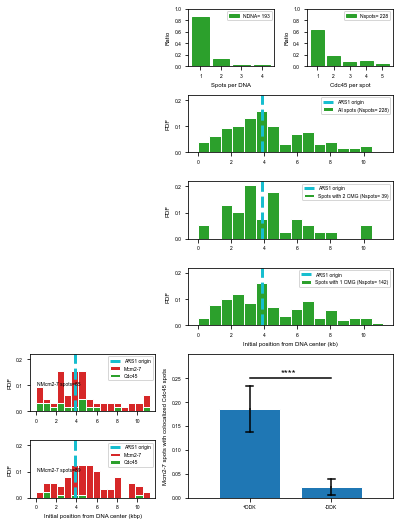

In [2]:
# Figure 1.

facecolor='tab:green'
edgecolor='white'

fig = plt.figure(figsize=(6.5, 9))
gs = matplotlib.gridspec.GridSpec(6, 10, wspace=5, hspace=0.5)


ax1 = fig.add_subplot(gs[0, 4:7])
ax2 = fig.add_subplot(gs[0, 7:10])
ax3 = fig.add_subplot(gs[1, 4:10])
ax4 = fig.add_subplot(gs[2, 4:10])
ax5 = fig.add_subplot(gs[3, 4:10])
ax6 = fig.add_subplot(gs[4:6, 4:10])
ax7 = fig.add_subplot(gs[4, 0:4])
ax8 = fig.add_subplot(gs[5, 0:4])



# fig = plt.figure(figsize=(7, 9))
# gs = matplotlib.gridspec.GridSpec(6, 4, wspace=0.5, hspace=0.5)


# ax1 = fig.add_subplot(gs[0, 2])
# ax2 = fig.add_subplot(gs[0, 3])
# ax3 = fig.add_subplot(gs[1, 2:4])
# ax4 = fig.add_subplot(gs[2, 2:4])
# ax5 = fig.add_subplot(gs[3, 2:4])
# ax6 = fig.add_subplot(gs[4:6, 2:4])
# ax7 = fig.add_subplot(gs[4, 0:2])
# ax8 = fig.add_subplot(gs[5, 0:2])
# Panel b

# Filter by stoichiometry
min_stoich=1 # set minimum stoichiometry allowed
max_stoich=5 # set maximum stoichiometry allowed

df_ATP_filtered = df_ATP.loc[df_ATP['step_count']>=min_stoich].copy()
df_ATP_filtered = df_ATP_filtered.loc[df_ATP_filtered['step_count']<=max_stoich].copy()
df_ATP_filtered = df_ATP_filtered[~df_ATP_filtered['step_count'].isna()]

df_NOATP_filtered = df_NOATP.loc[df_NOATP['step_count']>=min_stoich].copy()
df_NOATP_filtered = df_NOATP_filtered.loc[df_NOATP_filtered['step_count']<=max_stoich].copy()
df_NOATP_filtered = df_NOATP_filtered[~df_NOATP_filtered['step_count'].isna()]

df_ATPgS_filtered = df_ATPgS.loc[df_ATPgS['step_count']>=min_stoich].copy()
df_ATPgS_filtered = df_ATPgS_filtered.loc[df_ATPgS_filtered['step_count']<=max_stoich].copy()
df_ATPgS_filtered = df_ATPgS_filtered[~df_ATPgS_filtered['step_count'].isna()]


# Get spots per dna and stoichiometry per DNA (after filtering) ALL CONDITIONS

spots_per_DNA = [] # list of spot/DNA, sum of all stoichs for each DNA
stoichiometries=[] # list of all stoichiometrie of all the spots

for scan_id, df_scan in df_ATP_filtered.groupby('scan_id'):
    spots_this_DNA=[]
    stoichiometries_this_DNA=[]
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            spots_this_DNA.append(1)
            stoich_this_spot=[df_trace['step_count'].iloc[0]]
            stoichiometries_this_DNA.extend(stoich_this_spot)
            stoichiometries.extend(stoich_this_spot)
    stoichiometries_this_DNA.sort()          
    total_spots_DNA=np.sum(spots_this_DNA)
    sum_stoichs_this_DNA=np.sum(stoichiometries_this_DNA)
    spots_per_DNA.append((total_spots_DNA, sum_stoichs_this_DNA))
    
for scan_id, df_scan in df_NOATP_filtered.groupby('scan_id'):
    spots_this_DNA=[]
    stoichiometries_this_DNA=[]
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            spots_this_DNA.append(1)
            stoich_this_spot=[df_trace['step_count'].iloc[0]]
            stoichiometries_this_DNA.extend(stoich_this_spot)
            stoichiometries.extend(stoich_this_spot)
    stoichiometries_this_DNA.sort()          
    total_spots_DNA=np.sum(spots_this_DNA)
    sum_stoichs_this_DNA=np.sum(stoichiometries_this_DNA)
    spots_per_DNA.append((total_spots_DNA, sum_stoichs_this_DNA))
    
for scan_id, df_scan in df_ATPgS_filtered.groupby('scan_id'):
    spots_this_DNA=[]
    stoichiometries_this_DNA=[]
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            spots_this_DNA.append(1)
            stoich_this_spot=[df_trace['step_count'].iloc[0]]
            stoichiometries_this_DNA.extend(stoich_this_spot)
            stoichiometries.extend(stoich_this_spot)
    stoichiometries_this_DNA.sort()          
    total_spots_DNA=np.sum(spots_this_DNA)
    sum_stoichs_this_DNA=np.sum(stoichiometries_this_DNA)
    spots_per_DNA.append((total_spots_DNA, sum_stoichs_this_DNA)) 
    
#Convert spots per DNA to string and plot spot counts

spots_per_DNA_array = np.array([tup[0] for tup in spots_per_DNA])
spots_per_DNA_array=spots_per_DNA_array[spots_per_DNA_array>0]

labels, counts = np.unique(spots_per_DNA_array, return_counts=True)
ax1.bar(labels, counts/len(spots_per_DNA_array), facecolor=facecolor, edgecolor=facecolor)
ax1.set_ylabel('Ratio', fontsize=6)
ax1.set_xlabel('Spots per DNA', fontsize=6)
ax1.set_ylim(0, 1)
ax1.set_xticks(np.arange(1,np.max(spots_per_DNA_array)+1,1))
#ax1.set_yticks(np.arange(0, 1.1, 0.20))
ax1.legend(['NDNA= '+str(len(spots_per_DNA_array))], loc='upper right', fontsize=5)


# Panel c

#Plot stoichiometries
labels, counts = np.unique(stoichiometries, return_counts=True)
ax2.bar(labels, counts/len(stoichiometries), facecolor=facecolor, edgecolor=facecolor)
ax2.set_ylabel('Ratio', fontsize=6)
ax2.set_xlabel('Cdc45 per spot', fontsize=6)
ax2.set_ylim(0, 1)
ax2.set_xticks(np.arange(1,np.max(stoichiometries)+1,1))
ax2.set_yticks(np.arange(0, 1.1, 0.20))
plt.tick_params(axis='x')
plt.tick_params(axis='y')
ax2.legend(['Nspots= '+str(len(stoichiometries))], loc='upper right', fontsize=5)


# Panel d

# Get average position of first 3 frames after filtering spots appearing after a given frame

initial_locs= []

for scan_id, df_scan in df_ATP_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            init_loc = [np.mean(df_trace['x_kbp'].iloc[0:(N_frames_to_average-1)])]
            initial_locs.append(init_loc)

for scan_id, df_scan in df_NOATP_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            init_loc = [np.mean(df_trace['x_kbp'].iloc[0:(N_frames_to_average-1)])]
            initial_locs.append(init_loc) 

for scan_id, df_scan in df_ATPgS_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            init_loc = [np.mean(df_trace['x_kbp'].iloc[0:(N_frames_to_average-1)])]
            initial_locs.append(init_loc) 
            

initial_locs_np= np.array(initial_locs)
locs_from_center= abs(initial_locs_np-(DNA_len_kbp/2))


# Plot initial positions histogram of all spots

weights=np.zeros_like(locs_from_center)+1./locs_from_center.size
ax3.hist(locs_from_center, bins=bins, weights=weights, range=(0, DNA_len_kbp/2), edgecolor=edgecolor, facecolor=facecolor)
ax3.set_ylabel('PDF', fontsize=6)
ax3.set_ylim(0, 0.22)
ax3.set_xticks(np.arange(0,DNA_len_kbp/2,2))
ax3.set_yticks(np.arange(0, 0.22, 0.1))
ax3.axvline(3.860, color='tab:cyan', linestyle='dashed', linewidth=3) # Highlight origin
ax3.legend(['ARS1 origin','All spots (Nspots= '+str(len(locs_from_center))+')'], loc='upper right', fontsize=5)


# Panel e

# Filter by stoichiometry
min_stoich=2 # set minimum stoichiometry allowed
max_stoich=2 # set maximum stoichiometry allowed

df_ATP_filtered = df_ATP.loc[df_ATP['step_count']>=min_stoich].copy()
df_ATP_filtered = df_ATP_filtered.loc[df_ATP_filtered['step_count']<=max_stoich].copy()
df_ATP_filtered = df_ATP_filtered[~df_ATP_filtered['step_count'].isna()]

df_NOATP_filtered = df_NOATP.loc[df_NOATP['step_count']>=min_stoich].copy()
df_NOATP_filtered = df_NOATP_filtered.loc[df_NOATP_filtered['step_count']<=max_stoich].copy()
df_NOATP_filtered = df_NOATP_filtered[~df_NOATP_filtered['step_count'].isna()]

df_ATPgS_filtered = df_ATPgS.loc[df_ATPgS['step_count']>=min_stoich].copy()
df_ATPgS_filtered = df_ATPgS_filtered.loc[df_ATPgS_filtered['step_count']<=max_stoich].copy()
df_ATPgS_filtered = df_ATPgS_filtered[~df_ATPgS_filtered['step_count'].isna()]

initial_locs= []

for scan_id, df_scan in df_ATP_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            init_loc = [np.mean(df_trace['x_kbp'].iloc[0:(N_frames_to_average-1)])]
            initial_locs.append(init_loc)

for scan_id, df_scan in df_NOATP_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            init_loc = [np.mean(df_trace['x_kbp'].iloc[0:(N_frames_to_average-1)])]
            initial_locs.append(init_loc) 

for scan_id, df_scan in df_ATPgS_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            init_loc = [np.mean(df_trace['x_kbp'].iloc[0:(N_frames_to_average-1)])]
            initial_locs.append(init_loc) 
            
initial_locs_np= np.array(initial_locs)
locs_from_center= abs(initial_locs_np-(DNA_len_kbp/2))


# Plot initial positions histogram of all spots

weights=np.zeros_like(locs_from_center)+1./locs_from_center.size
ax4.hist(locs_from_center, bins=bins, weights=weights, range=(0, DNA_len_kbp/2), edgecolor=edgecolor, facecolor=facecolor)
ax4.set_ylabel('PDF', fontsize=6)
ax4.set_ylim(0, 0.22)
ax4.set_xticks(np.arange(0,DNA_len_kbp/2,2))
ax4.set_yticks(np.arange(0, 0.22, 0.1))
ax4.axvline(3.860, color='tab:cyan', linestyle='dashed', linewidth=3) # Highlight origin
ax4.legend(['ARS1 origin','Spots with 2 CMG (Nspots= '+str(len(locs_from_center))+')'], loc='upper right', fontsize=5)



# Panel f

# Filter by stoichiometry
min_stoich=1 # set minimum stoichiometry allowed
max_stoich=1 # set maximum stoichiometry allowed

df_ATP_filtered = df_ATP.loc[df_ATP['step_count']>=min_stoich].copy()
df_ATP_filtered = df_ATP_filtered.loc[df_ATP_filtered['step_count']<=max_stoich].copy()
df_ATP_filtered = df_ATP_filtered[~df_ATP_filtered['step_count'].isna()]

df_NOATP_filtered = df_NOATP.loc[df_NOATP['step_count']>=min_stoich].copy()
df_NOATP_filtered = df_NOATP_filtered.loc[df_NOATP_filtered['step_count']<=max_stoich].copy()
df_NOATP_filtered = df_NOATP_filtered[~df_NOATP_filtered['step_count'].isna()]

df_ATPgS_filtered = df_ATPgS.loc[df_ATPgS['step_count']>=min_stoich].copy()
df_ATPgS_filtered = df_ATPgS_filtered.loc[df_ATPgS_filtered['step_count']<=max_stoich].copy()
df_ATPgS_filtered = df_ATPgS_filtered[~df_ATPgS_filtered['step_count'].isna()]

initial_locs= []

for scan_id, df_scan in df_ATP_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            init_loc = [np.mean(df_trace['x_kbp'].iloc[0:(N_frames_to_average-1)])]
            initial_locs.append(init_loc)

for scan_id, df_scan in df_NOATP_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            init_loc = [np.mean(df_trace['x_kbp'].iloc[0:(N_frames_to_average-1)])]
            initial_locs.append(init_loc) 

for scan_id, df_scan in df_ATPgS_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        if df_trace['step_count'].iloc[0]>0 and df_trace['frame'].iloc[0]<=(max_initial_frame-1) and df_trace['x_kbp'].iloc[0] > dist_from_beads and df_trace['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
            init_loc = [np.mean(df_trace['x_kbp'].iloc[0:(N_frames_to_average-1)])]
            initial_locs.append(init_loc) 
            
initial_locs_np= np.array(initial_locs)
locs_from_center= abs(initial_locs_np-(DNA_len_kbp/2))


# Plot initial positions histogram of all spots

weights=np.zeros_like(locs_from_center)+1./locs_from_center.size
ax5.hist(locs_from_center, bins=bins, weights=weights, range=(0, DNA_len_kbp/2), edgecolor=edgecolor, facecolor=facecolor)
ax5.set_ylabel('PDF', fontsize=6)
ax5.set_ylim(0, 0.22)
ax5.set_xticks(np.arange(0,DNA_len_kbp/2,2))
ax5.set_yticks(np.arange(0, 0.22, 0.1))
ax5.axvline(3.860, color='tab:cyan', linestyle='dashed', linewidth=3) # Highlight origin
ax5.legend(['ARS1 origin','Spots with 1 CMG (Nspots= '+str(len(locs_from_center))+')'], loc='upper right', fontsize=5)
ax5.set_xlabel('Initial position from DNA center (kb)', fontsize=6)

# Panel j

# Filter by stoichiometry
min_stoich=1 # set minimum stoichiometry allowed
max_stoich=5 # set maximum stoichiometry allowed

df_DDK_filtered = df_DDK.loc[df_DDK['step_count']>=min_stoich].copy()
df_DDK_filtered = df_DDK_filtered.loc[df_DDK_filtered['step_count']<=max_stoich].copy()
df_DDK_filtered = df_DDK_filtered[~df_DDK_filtered['step_count'].isna()]

df_NO_DDK_filtered = df_NO_DDK.loc[df_NO_DDK['step_count']>=min_stoich].copy()
df_NO_DDK_filtered = df_NO_DDK_filtered.loc[df_NO_DDK_filtered['step_count']<=max_stoich].copy()
df_NO_DDK_filtered = df_NO_DDK_filtered[~df_NO_DDK_filtered['step_count'].isna()]

# Plot % colocalization + and - DDK and plot traces in their respective color

N_total_r_spots_DDK=[]
N_colocalized_r_spots_DDK=[]

N_total_r_spots_NO_DDK=[]
N_colocalized_r_spots_NO_DDK=[]

N_total_g_spots_DDK=[]
N_colocalized_g_spots_DDK=[]

N_total_g_spots_NO_DDK=[]
N_colocalized_g_spots_NO_DDK=[]

red_spots_x0_DDK=[]
red_spots_x0_NO_DDK=[]

green_spots_x0_DDK=[]
green_spots_x0_NO_DDK=[]

coloc_green_spots_x0_DDK=[]
coloc_green_spots_x0_NO_DDK=[]

for scan_id, df_scan in df_DDK_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        for track_id, df_track in df_trace.groupby('track_id'):
            if df_track['step_count'].iloc[0]>0 and df_track['frame'].iloc[0]<=(max_initial_frame-1) and df_track['x_kbp'].iloc[0] > dist_from_beads and df_track['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
                if df_track['color_str'].iloc[0]=='r':
                    N_total_r_spots_DDK.append(1)
                    init_loc_r = np.mean(df_track['x_kbp'].iloc[0:(N_frames_to_average-1)])
                    red_spots_x0_DDK.append(init_loc_r)
                    #plt.plot(df_track['time_s'], df_track['x_kbp'], color="red")
                    if df_track['colocalized'].iloc[0]==True:
                        N_colocalized_r_spots_DDK.append(1)
                if df_track['color_str'].iloc[0]=='g':
                    N_total_g_spots_DDK.append(1)
                    init_loc_g = np.mean(df_track['x_kbp'].iloc[0:(N_frames_to_average-1)])
                    green_spots_x0_DDK.append(init_loc_g)
                    if df_track['colocalized'].iloc[0]==True:
                        N_colocalized_g_spots_DDK.append(1)
                        coloc_green_spots_x0_DDK.append(init_loc_g)
                 
            
for scan_id, df_scan in df_NO_DDK_filtered.groupby('scan_id'):
    for trace_id, df_trace in df_scan.groupby('trace_id'):
        for track_id, df_track in df_trace.groupby('track_id'):
            if df_track['step_count'].iloc[0]>0 and df_track['frame'].iloc[0]<=(max_initial_frame-1) and df_track['x_kbp'].iloc[0] > dist_from_beads and df_track['x_kbp'].iloc[0] < DNA_len_kbp-dist_from_beads:
                if df_track['color_str'].iloc[0]=='r':
                    N_total_r_spots_NO_DDK.append(1) 
                    init_loc_r = np.mean(df_track['x_kbp'].iloc[0:(N_frames_to_average-1)])
                    red_spots_x0_NO_DDK.append(init_loc_r) 
                    #plt.plot(df_track['time_s'], df_track['x_kbp'], color="red")
                    if df_track['colocalized'].iloc[0]==True:
                        N_colocalized_r_spots_NO_DDK.append(1)
                if df_track['color_str'].iloc[0]=='g':
                    N_total_g_spots_NO_DDK.append(1)
                    init_loc_g = np.mean(df_track['x_kbp'].iloc[0:(N_frames_to_average-1)])
                    green_spots_x0_NO_DDK.append(init_loc_g)
                    if df_track['colocalized'].iloc[0]==True:
                        N_colocalized_g_spots_NO_DDK.append(1)
                        coloc_green_spots_x0_NO_DDK.append(init_loc_g)

N_total_r_spots_DDK_np= np.array(N_total_r_spots_DDK)            
N_colocalized_r_spots_DDK_np= np.array(N_colocalized_r_spots_DDK)

N_total_r_spots_NO_DDK_np= np.array(N_total_r_spots_NO_DDK)
N_colocalized_r_spots_NO_DDK_np= np.array(N_colocalized_r_spots_NO_DDK)

initial_locs_red_DDK_np= np.array(red_spots_x0_DDK)
initial_locs_red_NO_DDK_np= np.array(red_spots_x0_NO_DDK)

locs_from_center_r_DDK= abs(initial_locs_red_DDK_np-(DNA_len_kbp/2))
locs_from_center_r_NO_DDK= abs(initial_locs_red_NO_DDK_np-(DNA_len_kbp/2))


N_total_g_spots_DDK_np= np.array(N_total_g_spots_DDK)            
N_colocalized_g_spots_DDK_np= np.array(N_colocalized_g_spots_DDK)

N_total_g_spots_NO_DDK_np= np.array(N_total_g_spots_NO_DDK)
N_colocalized_g_spots_NO_DDK_np= np.array(N_colocalized_g_spots_NO_DDK)

initial_locs_green_DDK_np= np.array(green_spots_x0_DDK)
initial_locs_green_NO_DDK_np= np.array(green_spots_x0_NO_DDK)

locs_from_center_g_DDK= abs(initial_locs_green_DDK_np-(DNA_len_kbp/2))
locs_from_center_g_NO_DDK= abs(initial_locs_green_NO_DDK_np-(DNA_len_kbp/2))

initial_locs_coloc_green_DDK_np= np.array(coloc_green_spots_x0_DDK)
initial_locs_coloc_green_NO_DDK_np= np.array(coloc_green_spots_x0_NO_DDK)

locs_from_center_coloc_g_DDK= abs(initial_locs_coloc_green_DDK_np-(DNA_len_kbp/2))
locs_from_center_coloc_g_NO_DDK= abs(initial_locs_coloc_green_NO_DDK_np-(DNA_len_kbp/2))


# Perform binomial test

p_val=stats.binom_test(len(N_colocalized_r_spots_DDK_np), n=len(N_total_r_spots_DDK_np), p=(len(N_colocalized_r_spots_NO_DDK_np) / len(N_total_r_spots_NO_DDK_np)), alternative='two-sided')
print(p_val)

# Plot colocalized MCM/total MCM ratios.

bars_DDK = [len(N_colocalized_r_spots_DDK_np) / len(N_total_r_spots_DDK_np)]
bars_NO_DDK = [len(N_colocalized_r_spots_NO_DDK_np) / len(N_total_r_spots_NO_DDK_np)]

x_DDK = [0.05]
x_NO_DDK = [0.25]

ax6.bar(x_DDK, bars_DDK, width=0.15, edgecolor='white', facecolor='tab:blue')
ax6.set_xticks([0.05, 0.25])
ax6.set_xticklabels(['+DDK', '-DDK'])
ax6.set_ylim(0, 0.3)
ax6.set_xlim(-0.1, 0.4)
ax6.set_ylabel('Mcm2-7 spots with colocalized Cdc45 spots', fontsize=6)
ax6.set_yticks(np.arange(0, 0.28, 0.05))
ax6.bar(x_NO_DDK, bars_NO_DDK, width=0.15,edgecolor='white', facecolor='tab:blue')

# computing standard error of proportion

error_DDK=np.sqrt(((bars_DDK[0]*(1-bars_DDK[0])))/len(N_total_r_spots_DDK_np))
error_NO_DDK=np.sqrt(((bars_NO_DDK[0])*(1-bars_NO_DDK[0]))/len(N_total_r_spots_NO_DDK_np))

# add error bars

coord_y = bars_DDK[0]+0.05
ax6.plot([x_DDK[0], x_DDK[0]], [bars_DDK[0], bars_DDK[0]+error_DDK], '-', color='black')
ax6.plot([x_DDK[0]-0.008, x_DDK[0]+0.008], [bars_DDK[0]+error_DDK, bars_DDK[0]+error_DDK], '-', color='black')

ax6.plot([x_DDK[0], x_DDK[0]], [bars_DDK[0], bars_DDK[0]-error_DDK], '-', color='black')
ax6.plot([x_DDK[0]-0.008, x_DDK[0]+0.008], [bars_DDK[0]-error_DDK, bars_DDK[0]-error_DDK], '-', color='black')


ax6.plot([x_NO_DDK, x_NO_DDK], [bars_NO_DDK[0], bars_NO_DDK[0]+error_NO_DDK], '-', color='black')
ax6.plot([x_NO_DDK[0]-0.008, x_NO_DDK[0]+0.008], [bars_NO_DDK[0]+error_NO_DDK, bars_NO_DDK[0]+error_NO_DDK], '-', color='black')

ax6.plot([x_NO_DDK, x_NO_DDK], [bars_NO_DDK[0], bars_NO_DDK[0]-error_NO_DDK], '-', color='black')
ax6.plot([x_NO_DDK[0]-0.008, x_NO_DDK[0]+0.008], [bars_NO_DDK[0]-error_NO_DDK, bars_NO_DDK[0]-error_NO_DDK], '-', color='black')


# Add statistical significance
ax6.plot([x_DDK, x_NO_DDK], [coord_y+0.015, coord_y+0.015], '-', color='black')
ax6.text((x_DDK[0]+x_NO_DDK[0])/2-0.025,bars_DDK[0]+0.07,'****', fontsize=10)


# Panel h

weights_r_DDK=np.zeros_like(locs_from_center_r_DDK)+1./len(locs_from_center_r_DDK)
weights_g_DDK=np.zeros_like(locs_from_center_g_DDK)+1./len(locs_from_center_r_DDK)

ax7.axvline(3.860, color='tab:cyan', linestyle='dashed', linewidth=3) # Highlight origin
ax7.hist(locs_from_center_r_DDK, bins=bins, weights=weights_r_DDK, range=(0, DNA_len_kbp), edgecolor=edgecolor, facecolor='tab:red')
ax7.set_ylabel('PDF', fontsize=6)
ax7.set_ylim(0, 0.22)
ax7.set_xticks(np.arange(0,DNA_len_kbp/2,2))
ax7.set_yticks(np.arange(0, 0.22, 0.1))
ax7.hist(locs_from_center_g_DDK, bins=bins, weights=weights_g_DDK, range=(0, DNA_len_kbp), edgecolor=edgecolor, facecolor='tab:green', stacked=True)
ax7.legend(['ARS1 origin','Mcm2-7','Cdc45'], loc='upper right', fontsize=5)
ax7.text(0.1,0.1,'NMcm2-7 spots='+str(len(locs_from_center_r_DDK)), fontsize=5)

# Panel i


weights_r_NO_DDK=np.zeros_like(locs_from_center_r_NO_DDK)+1./len(locs_from_center_r_NO_DDK)
weights_g_NO_DDK=np.zeros_like(locs_from_center_g_NO_DDK)+1./len(locs_from_center_r_NO_DDK)

ax8.axvline(3.860, color='tab:cyan', linestyle='dashed', linewidth=3) # Highlight origin
ax8.hist(locs_from_center_r_NO_DDK, bins=bins, weights=weights_r_NO_DDK, range=(0, DNA_len_kbp), edgecolor=edgecolor, facecolor='tab:red')
ax8.set_ylabel('PDF', fontsize=6)
ax8.set_ylim(0, 0.22)
ax8.set_xticks(np.arange(0,DNA_len_kbp/2,2))
ax8.set_yticks(np.arange(0, 0.22, 0.1))
ax8.hist(locs_from_center_g_NO_DDK, bins=bins, weights=weights_g_NO_DDK, range=(0, DNA_len_kbp), edgecolor=edgecolor, facecolor='tab:green', stacked=True)
ax8.legend(['ARS1 origin','Mcm2-7','Cdc45'], loc='upper right', fontsize=5)
ax8.set_xlabel(r'Initial position from DNA center (kbp)', fontsize=6)
ax8.text(0.1,0.1,'NMcm2-7 spots='+str(len(locs_from_center_r_NO_DDK)), fontsize=5)




# Finish up and save.
ax1.tick_params(axis='x', labelsize=5)
ax2.tick_params(axis='x', labelsize=5)
ax3.tick_params(axis='x', labelsize=5)
ax4.tick_params(axis='x', labelsize=5)
ax5.tick_params(axis='x', labelsize=5)
ax6.tick_params(axis='x', labelsize=5)
ax7.tick_params(axis='x', labelsize=5)
ax8.tick_params(axis='x', labelsize=5)

ax1.tick_params(axis='y', labelsize=5)
ax2.tick_params(axis='y', labelsize=5)
ax3.tick_params(axis='y', labelsize=5)
ax4.tick_params(axis='y', labelsize=5)
ax5.tick_params(axis='y', labelsize=5)
ax6.tick_params(axis='y', labelsize=5)
ax7.tick_params(axis='y', labelsize=5)
ax8.tick_params(axis='y', labelsize=5)



plt.tight_layout()
# plt.savefig('F1.PDF', dpi=600)
plt.show()
plt.close()